## Taylor Series

In [121]:
import numpy as np
import matplotlib.pyplot as plt


taking h=0.1 gives a coarse graph, however 0.01 gives a smooth nice curve

In [122]:
h = 0.05
x = np.arange(0, 1, h)
n = x.size
fx = np.abs(x * np.sin(10*x))
# fx = np.exp(x)

using central difference to make the difference matrix

$$
\begin{split}\mathbf{D}_x = \frac{1}{h}
\begin{bmatrix}
-\frac{3}{2} & 2    & -\frac{1}{2}   &        &        &  \\[1mm]
-\frac{1}{2} & 0    & \frac{1}{2}    &        &        &  \\[1mm]
& -\frac{1}{2} & 0      & \frac{1}{2}    &        &  \\
&      & \ddots & \ddots & \ddots &  \\
&      &        & -\frac{1}{2}   & 0      & \frac{1}{2} \\[1mm]
&      &        & \frac{1}{2}    & -2     & \frac{3}{2}
\end{bmatrix}.\end{split}
$$

In [123]:
top = np.zeros([1, n])
top[0, 0:3] = [-3/2, 2, -1/2]

bottom = np.zeros([1, n])
bottom[0, -3:] = [1/2, -2, 3/2]

In [124]:
mat_cd = -1/2*np.eye(n-2, n) + 1/2*np.eye(n-2, n, k=2)
mat_cd = np.concatenate([top, mat_cd, bottom])

Dx = mat_cd/h
Dx

array([[-30.,  40., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-10.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., -10.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -10.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., -10.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -10.,   0.,  10.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., -10.,   0.,  10.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0

In [125]:
I = np.identity(n)

In [126]:
fx_1 = Dx @ fx
fx_1

array([ 1.17380092e-01,  8.41470985e-01,  1.25652971e+00,  9.77123869e-01,
       -6.21196462e-05, -1.39523483e+00, -2.68439063e-01,  2.60384996e+00,
        3.17114423e+00,  1.76741139e+00, -5.18413739e-01, -3.11812838e+00,
       -2.48219187e+00,  2.92241320e+00,  5.63671990e+00,  3.31595978e+00,
       -2.47859369e-01, -4.20579961e+00, -6.07320481e+00, -5.90731808e+00])

In [127]:
np.allclose(np.gradient(fx, h, edge_order=2), fx_1)

True

### Part A

$I + h D_x$

In [128]:
F = I + h * Dx
Ff = F @ fx

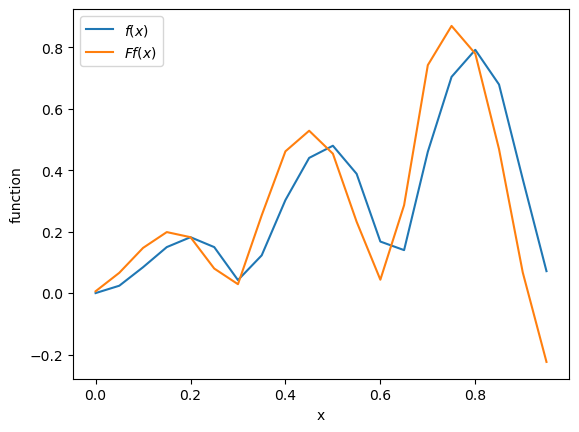

In [129]:
plt.plot(x, fx, label='$f(x)$')
plt.plot(x, Ff, label='$F f(x)$')
plt.xlabel('x')
plt.ylabel('function')
plt.legend()

The operator F is predicting the value of function at $x+h$ for any $x$ by using 1st order Taylor series approximation\
Perhaps, it would be better to display the next predicted value

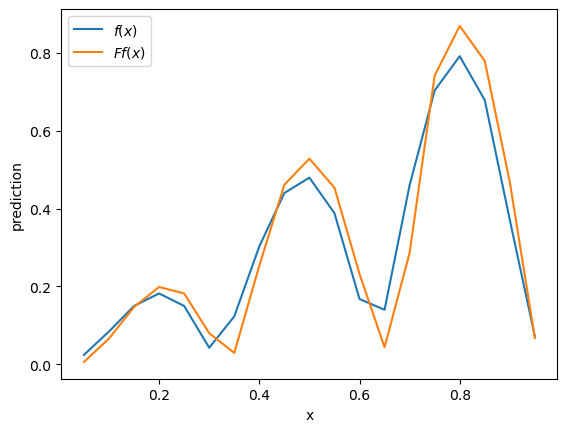

In [130]:
plt.plot(x[1:], fx[1:], label='$f(x)$')
plt.plot(x[1:], Ff[:-1], label='$F f(x)$')
plt.xlabel('x')
plt.ylabel('prediction')
plt.legend()

### Part B

In [131]:
S = I + h*Dx + h*h/2 * Dx @ Dx
Sf = S @ fx

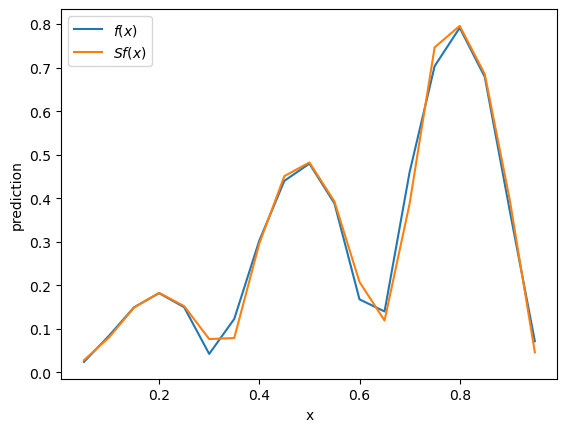

In [132]:
plt.plot(x[1:], fx[1:],  label='$f(x)$')
plt.plot(x[1:], Sf[:-1], label='$S f(x)$')
plt.xlabel('x')
plt.ylabel('prediction')
plt.legend()

### Part C

In [133]:
T = S + h**3/6 * Dx @ Dx @ Dx
Tf = T @ fx

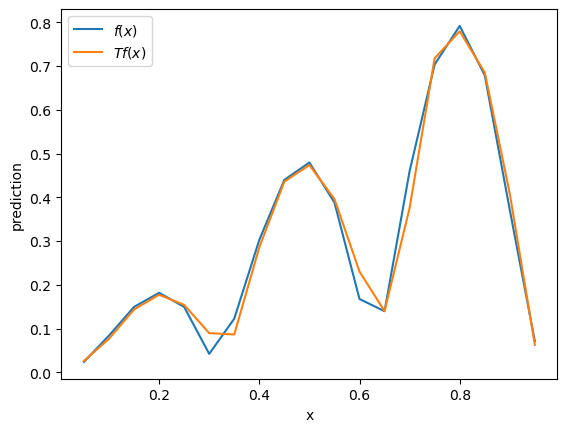

In [134]:
plt.plot(x[1:], fx[1:],  label='$f(x)$')
plt.plot(x[1:], Tf[:-1], label='$T f(x)$')
plt.xlabel('x')
plt.ylabel('prediction')
plt.legend()

We can clearly see that the prediction gets better as we use higher order terms of the taylor series expantion